## Preprocessing

In [64]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.callbacks import Callback
import os

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [65]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_clean = application_df.copy()
application_clean.drop(columns=["EIN","NAME","STATUS","INCOME_AMT"], axis=1, inplace=True)
application_clean.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,N,142590,1


In [66]:
# Determine the number of unique values in each column.
application_clean.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [67]:
# Look at APPLICATION_TYPE value counts for binning
application_values = application_clean["APPLICATION_TYPE"].value_counts()
application_values

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [68]:
#Compile values into dictionary
application_dict = application_values.to_dict()

In [69]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = []

for key,value in application_dict.items():
  if value < 528:
    application_types_to_replace.append(key)

# Replace in dataframe
for app in application_types_to_replace:
    application_clean['APPLICATION_TYPE'] = application_clean['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_clean['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [70]:
# Look at CLASSIFICATION value counts for binning
class_values = application_clean["CLASSIFICATION"].value_counts()
class_values

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [71]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_values_limited = application_clean["CLASSIFICATION"].value_counts()[application_clean["CLASSIFICATION"].value_counts() >1]
class_values_limited

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [72]:
# Convert value counts to dict
class_dict = class_values.to_dict()

In [73]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []

for key,value in class_dict.items():
  if value < 287:
    classifications_to_replace.append(key)


# Replace in dataframe
for cls in classifications_to_replace:
    application_clean['CLASSIFICATION'] = application_clean['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_clean['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [74]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_clean, columns=["SPECIAL_CONSIDERATIONS", "APPLICATION_TYPE", "CLASSIFICATION",\
                                                                 "AFFILIATION", "USE_CASE", "ORGANIZATION"])

application_dummies.head()

,ASK_AMT,IS_SUCCESSFUL,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,5000,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,108590,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,5000,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,6692,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,142590,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [75]:
# Split our preprocessed data into our features and target arrays
y = application_dummies["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_dummies.copy()
X.drop(columns="IS_SUCCESSFUL", axis=1, inplace=True)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [76]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [77]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 80)                2880      
                                                                 
 dense_12 (Dense)            (None, 30)                2430      
                                                                 
 dense_13 (Dense)            (None, 30)                930       
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [79]:
# Callbacks loop via ChatGPT
class SaveModelWeights(Callback):
    def __init__(self, save_dir, save_interval=5):
        super(SaveModelWeights, self).__init__()
        self.save_dir = save_dir
        self.save_interval = save_interval
        self.epoch_count = 0

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_count += 1
        if self.epoch_count % self.save_interval == 0:
            model_name = f"model_weights_epoch_{self.epoch_count}.h5"
            save_path = os.path.join(self.save_dir, model_name)
            self.model.save_weights(save_path)
            print(f"Saved model weights at epoch {self.epoch_count} to {save_path}")


# Directory to save model weights
save_dir = 'model_weights'

# Create the callback
save_callback = SaveModelWeights(save_dir, save_interval=5)


In [80]:
# Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[save_callback])
fit_model = nn.fit(X_train_scaled,y_train,epochs=400)


Epoch 1/400
804/804 [==============================] - 7s 6ms/step - loss: 0.5728 - accuracy: 0.7191
Epoch 2/400
804/804 [==============================] - 5s 6ms/step - loss: 0.5620 - accuracy: 0.7252
Epoch 3/400
804/804 [==============================] - 6s 7ms/step - loss: 0.5597 - accuracy: 0.7249
Epoch 4/400
804/804 [==============================] - 5s 7ms/step - loss: 0.5589 - accuracy: 0.7270
Epoch 5/400
804/804 [==============================] - 5s 7ms/step - loss: 0.5577 - accuracy: 0.7271
Epoch 6/400
804/804 [==============================] - 5s 7ms/step - loss: 0.5570 - accuracy: 0.7277
Epoch 7/400
804/804 [==============================] - 5s 7ms/step - loss: 0.5564 - accuracy: 0.7277
Epoch 8/400
804/804 [==============================] - 5s 7ms/step - loss: 0.5561 - accuracy: 0.7281
Epoch 9/400
804/804 [==============================] - 6s 7ms/step - loss: 0.5560 - accuracy: 0.7281
Epoch 10/400
804/804 [==============================] - 6s 7ms/step - loss: 0.5558 - accura

804/804 [==============================] - 5s 7ms/step - loss: 0.5466 - accuracy: 0.7341
Epoch 82/400
804/804 [==============================] - 5s 6ms/step - loss: 0.5458 - accuracy: 0.7340
Epoch 83/400
804/804 [==============================] - 5s 6ms/step - loss: 0.5461 - accuracy: 0.7350
Epoch 84/400
804/804 [==============================] - 5s 6ms/step - loss: 0.5460 - accuracy: 0.7346
Epoch 85/400
804/804 [==============================] - 5s 6ms/step - loss: 0.5460 - accuracy: 0.7347
Epoch 86/400
804/804 [==============================] - 5s 6ms/step - loss: 0.5463 - accuracy: 0.7347
Epoch 87/400
804/804 [==============================] - 5s 6ms/step - loss: 0.5458 - accuracy: 0.7343
Epoch 88/400
804/804 [==============================] - 5s 6ms/step - loss: 0.5457 - accuracy: 0.7337
Epoch 89/400
804/804 [==============================] - 5s 6ms/step - loss: 0.5457 - accuracy: 0.7350
Epoch 90/400
804/804 [==============================] - 5s 6ms/step - loss: 0.5460 - accuracy: 

804/804 [==============================] - 3s 4ms/step - loss: 0.5438 - accuracy: 0.7346
Epoch 161/400
804/804 [==============================] - 3s 4ms/step - loss: 0.5439 - accuracy: 0.7361
Epoch 162/400
804/804 [==============================] - 3s 4ms/step - loss: 0.5441 - accuracy: 0.7353
Epoch 163/400
804/804 [==============================] - 3s 4ms/step - loss: 0.5438 - accuracy: 0.7362
Epoch 164/400
804/804 [==============================] - 3s 4ms/step - loss: 0.5434 - accuracy: 0.7348
Epoch 165/400
804/804 [==============================] - 3s 3ms/step - loss: 0.5435 - accuracy: 0.7357
Epoch 166/400
804/804 [==============================] - 4s 5ms/step - loss: 0.5432 - accuracy: 0.7354
Epoch 167/400
804/804 [==============================] - 8s 9ms/step - loss: 0.5437 - accuracy: 0.7357
Epoch 168/400
804/804 [==============================] - 5s 7ms/step - loss: 0.5437 - accuracy: 0.7347
Epoch 169/400
804/804 [==============================] - 6s 8ms/step - loss: 0.5436 - a

804/804 [==============================] - 3s 4ms/step - loss: 0.5428 - accuracy: 0.7356
Epoch 240/400
804/804 [==============================] - 3s 4ms/step - loss: 0.5427 - accuracy: 0.7359
Epoch 241/400
804/804 [==============================] - 3s 4ms/step - loss: 0.5426 - accuracy: 0.7359
Epoch 242/400
804/804 [==============================] - 3s 3ms/step - loss: 0.5425 - accuracy: 0.7360
Epoch 243/400
804/804 [==============================] - 3s 3ms/step - loss: 0.5426 - accuracy: 0.7360
Epoch 244/400
804/804 [==============================] - 3s 3ms/step - loss: 0.5425 - accuracy: 0.7362
Epoch 245/400
804/804 [==============================] - 3s 3ms/step - loss: 0.5450 - accuracy: 0.7362
Epoch 246/400
804/804 [==============================] - 3s 3ms/step - loss: 0.5426 - accuracy: 0.7361
Epoch 247/400
804/804 [==============================] - 3s 4ms/step - loss: 0.5427 - accuracy: 0.7364
Epoch 248/400
804/804 [==============================] - 3s 4ms/step - loss: 0.5424 - a

804/804 [==============================] - 2s 2ms/step - loss: 0.5421 - accuracy: 0.7360
Epoch 319/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5418 - accuracy: 0.7363
Epoch 320/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5418 - accuracy: 0.7371
Epoch 321/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5417 - accuracy: 0.7362
Epoch 322/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5416 - accuracy: 0.7371
Epoch 323/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5420 - accuracy: 0.7369
Epoch 324/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5431 - accuracy: 0.7367
Epoch 325/400
804/804 [==============================] - 1s 2ms/step - loss: 0.5421 - accuracy: 0.7360
Epoch 326/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5421 - accuracy: 0.7365
Epoch 327/400
804/804 [==============================] - 1s 2ms/step - loss: 0.5418 - a

804/804 [==============================] - 1s 2ms/step - loss: 0.5415 - accuracy: 0.7363
Epoch 398/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5413 - accuracy: 0.7369
Epoch 399/400
804/804 [==============================] - 2s 3ms/step - loss: 0.5419 - accuracy: 0.7369
Epoch 400/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5422 - accuracy: 0.7360


In [81]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5638 - accuracy: 0.7285 - 577ms/epoch - 2ms/step
Loss: 0.5638404488563538, Accuracy: 0.7285131216049194


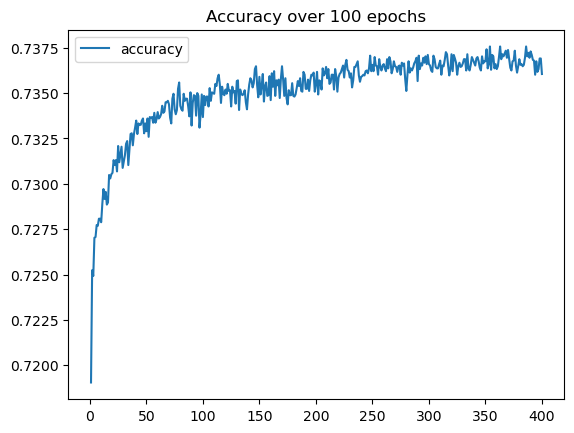

In [82]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="accuracy",title="Accuracy over 100 epochs")

plt.savefig('Plots/opt_accuracy.png')
plt.show()

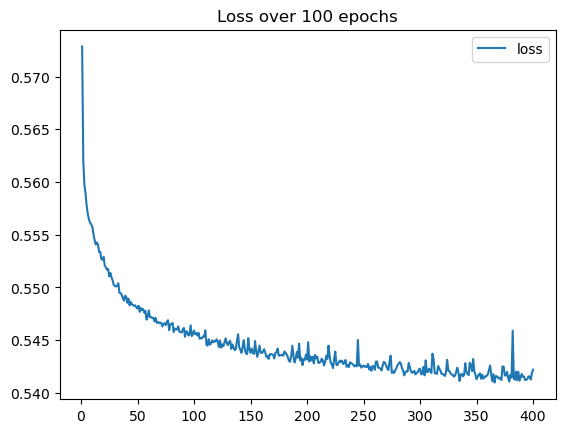

In [83]:
# Plot the loss
history_df.plot(y="loss", title="Loss over 100 epochs")

plt.savefig('Plots/opt_loss.png')
plt.show()

In [84]:
# Export our model to HDF5 file
nn.save("H5_Files/AlphabetSoupCharity_Opt2.h5")